# SWMT prescribed comparison

In [1]:
import intake
import glob

import dask.distributed
import gsw
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

import warnings # ignore these warnings
warnings.filterwarnings("ignore", category = FutureWarning)
warnings.filterwarnings("ignore", category = UserWarning)
warnings.filterwarnings("ignore", category = RuntimeWarning)

In [2]:
#Starting a dask client
from os import environ
environ["PYTHONWARNINGS"] = "ignore"

from dask.distributed import Client
client = Client(threads_per_worker = 1)

## Time series

### Importing the data

In [3]:
pan01_anom = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/new_Pan01_SWMT_shelf_rho0/plots/swmt_shelf_time_pan01_rho0_anom.nc', chunks = 'auto') 
acc_anom = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/new_ACCESS_SWMT_shelf_rho0/plots/swmt_shelf_time_access_rho0_anom.nc', chunks = 'auto')

In [4]:
pan01_anom_new = pan01_anom.to_series()
acc_anom_new = acc_anom.to_series()

In [5]:
pan01_time_C = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/new_Pan01_SWMT_shelf_rho0/plots/swmt_shelf_time_pan01_rho0_C.nc', chunks = 'auto') 
pan01_time_M = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/new_Pan01_SWMT_shelf_rho0/plots/swmt_shelf_time_pan01_rho0_M.nc', chunks = 'auto') 
acc_time_C = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/new_ACCESS_SWMT_shelf_rho0/plots/swmt_shelf_time_access_rho0_C.nc', chunks = 'auto')
acc_time_M = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/new_ACCESS_SWMT_shelf_rho0/plots/swmt_shelf_time_access_rho0_M.nc', chunks = 'auto')

In [6]:
pan01_time_C = pan01_time_C.to_series()
pan01_time_M = pan01_time_M.to_series()
acc_time_C = acc_time_C.to_series()
acc_time_M = acc_time_M.to_series()

### Plotting

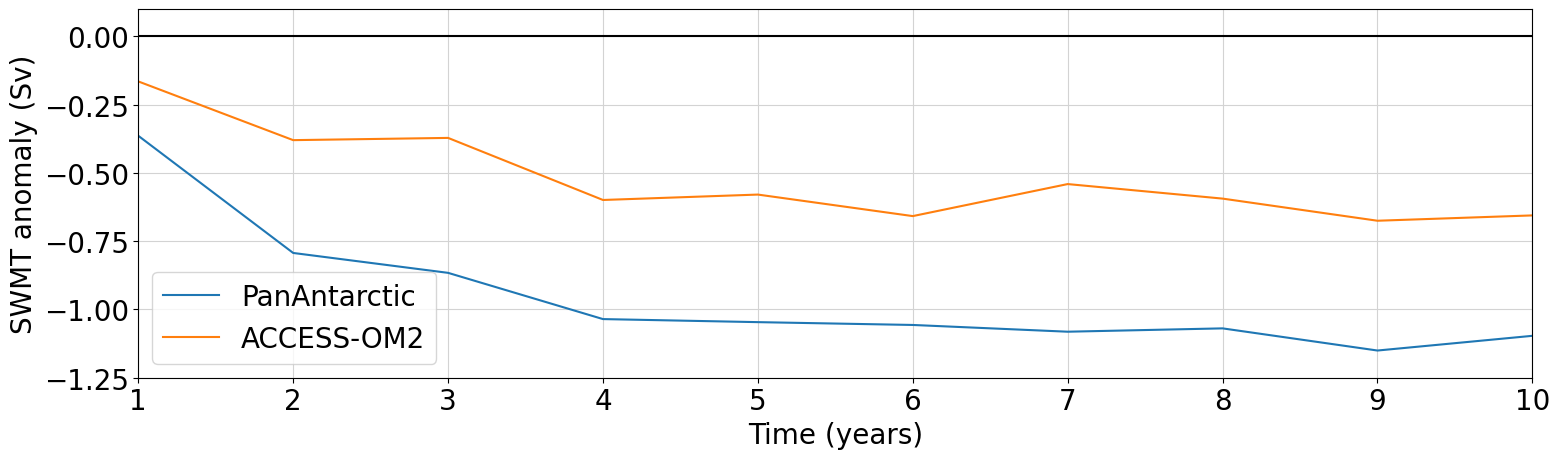

In [18]:
plt.rcParams['font.size'] = 20

# Note, the '+1' is to make the data go from 1-10 instead of 0-9. 
plt.figure(figsize=(16, 5))
plt.plot(pan01_anom_new.index + 1, pan01_anom_new.values, label='PanAntarctic')
plt.plot(acc_anom_new.index + 1, acc_anom_new.values, label='ACCESS-OM2')

# Labeling and formatting
plt.xlim(1, 10)
plt.ylim(-1.25,0.1)
plt.xlabel('Time (years)')
plt.ylabel("SWMT anomaly (Sv)")
plt.title('')#'Surface water mass transformation anomaly for DSW on shelf')
plt.legend()
plt.grid(True, color='lightgrey')
plt.axhline(y=0, color='black', linestyle='-')
plt.tight_layout()
plt.show()

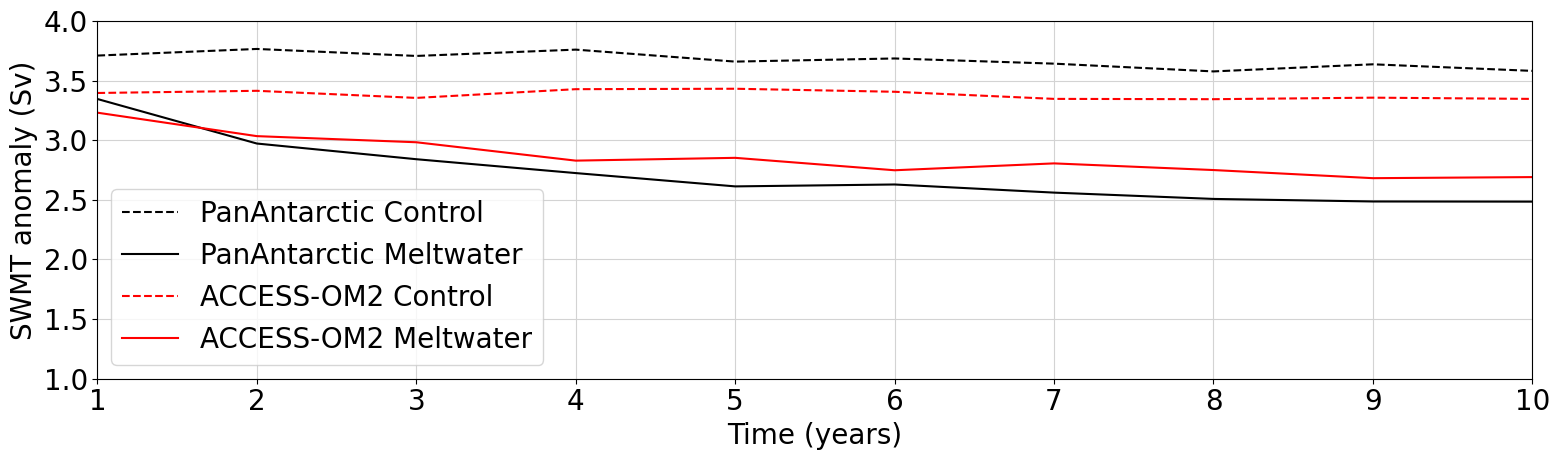

In [22]:
plt.rcParams['font.size'] = 20

# Note, the '+1' is to make the data go from 1-10 instead of 0-9. 
plt.figure(figsize=(16, 5))
plt.plot(pan01_time_C.index + 1, pan01_time_C.values, linestyle='--', color = 'black', label='PanAntarctic Control')
plt.plot(pan01_time_M.index + 1, pan01_time_M.values,linestyle='-', color = 'black', label='PanAntarctic Meltwater')
plt.plot(acc_time_C.index + 1, acc_time_C.values, linestyle='--',color='red', label='ACCESS-OM2 Control')
plt.plot(acc_time_M.index + 1, acc_time_M.values, linestyle='-',color='red', label='ACCESS-OM2 Meltwater')

# Labeling and formatting
plt.xlim(1, 10)
plt.ylim(1,4)
plt.xlabel('Time (years)')
plt.ylabel("SWMT anomaly (Sv)")
plt.title('')#'Surface water mass transformation anomaly for DSW on shelf')
plt.legend()
plt.grid(True, color='lightgrey')
plt.axhline(y=0, color='black', linestyle='-')
plt.tight_layout()
plt.show()

## Isopycnal bins plot

In [3]:
pan01_C = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/new_Pan01_SWMT_shelf_rho0/plots/swmt_shelf_sum_ave_C_pan01_rho0.nc', chunks = 'auto') 
pan01_M = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/new_Pan01_SWMT_shelf_rho0/plots/swmt_shelf_sum_ave_M_pan01_rho0.nc', chunks = 'auto') 
acc_C = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/new_ACCESS_SWMT_shelf_rho0/plots/swmt_shelf_sum_ave_C_access_rho0.nc', chunks = 'auto') 
acc_M = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/new_ACCESS_SWMT_shelf_rho0/plots/swmt_shelf_sum_ave_M_access_rho0.nc', chunks = 'auto') 

In [4]:
pan01_25 = 27.89
pan01_75 = 27.73 
ACC_25 = 27.93
ACC_75 = 27.79

''

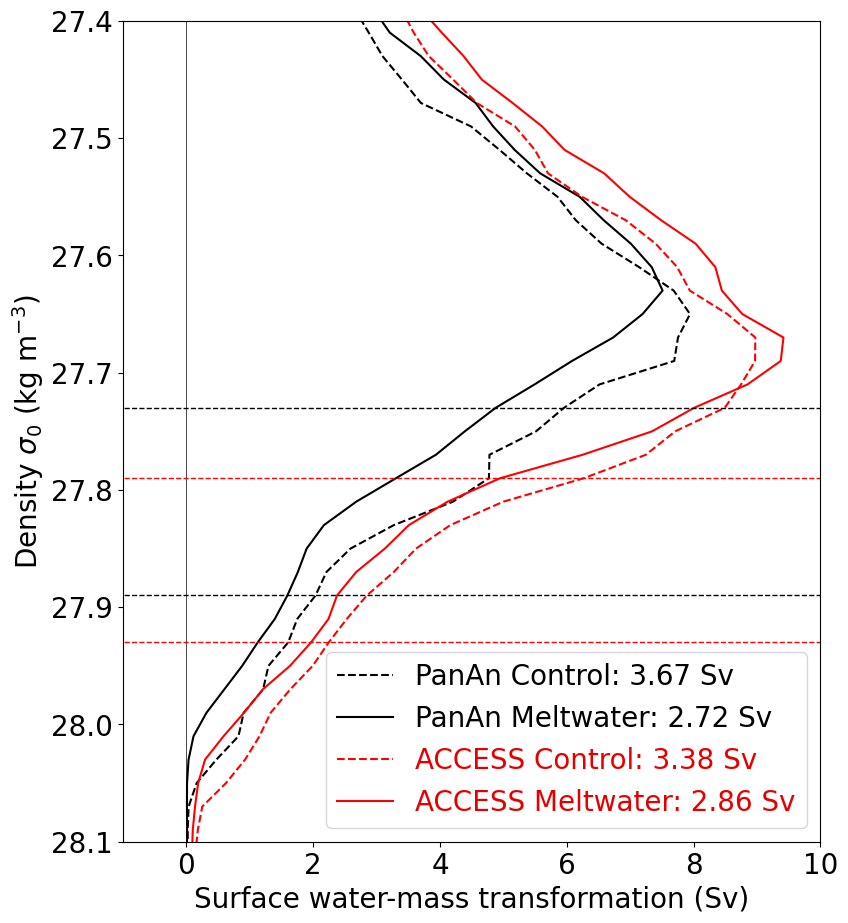

In [5]:
plt.rcParams['font.size'] = 20


fig, ax1 = plt.subplots(figsize=(9, 10.66))

ax1.plot(pan01_C, pan01_C['isopycnal_bins'], linestyle='--', color = 'black', label='PanAn Control: 3.67 Sv')
ax1.plot(pan01_M, pan01_M['isopycnal_bins'], 'black', label='PanAn Meltwater: 2.72 Sv')
ax1.plot(acc_C, acc_C['isopycnal_bins'], linestyle='--',color='red', label='ACCESS Control: 3.38 Sv')
ax1.plot(acc_M, acc_M['isopycnal_bins'], 'red', label='ACCESS Meltwater: 2.86 Sv')

ax1.plot([0, 0], [27.4, 28.1], 'k', linewidth=0.5)
ax1.plot([-5, 15], [pan01_25, pan01_25], 'k--', linewidth=1)
ax1.plot([-5, 15], [pan01_75, pan01_75], 'k--', linewidth=1)
ax1.plot([-5, 15], [ACC_25, ACC_25], 'r--', linewidth=1)
ax1.plot([-5, 15], [ACC_75, ACC_75], 'r--', linewidth=1)

leg = plt.legend()
# Access the text objects in the legend
for text, color in zip(leg.get_texts(), ['black', 'black','#E50000','#E50000']):
    text.set_color(color)

ax1.set_ylim((28.1, 27.4))
ax1.set_xlim((-1, 10))
ax1.yaxis.set_label_position("left")
ax1.yaxis.tick_left()
ax1.set_ylabel('Density $\sigma_0$ (kg m$^{-3}$)')
ax1.set_xlabel('Surface water-mass transformation (Sv)')
;

Need to play around with best presentation a bit.

''

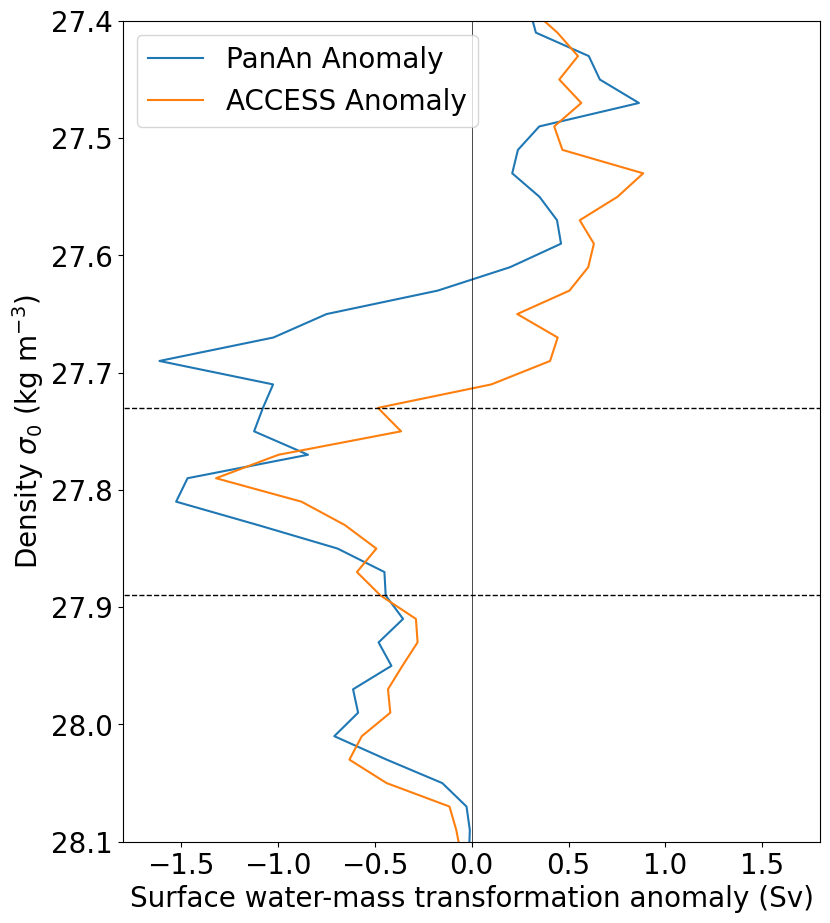

In [30]:
fig, ax1 = plt.subplots(figsize=(9, 10.66))

ax1.plot((pan01_M-pan01_C), (pan01_M-pan01_C)['isopycnal_bins'], label='PanAn Anomaly')
ax1.plot((acc_M-acc_C), (acc_M-acc_C)['isopycnal_bins'], label='ACCESS Anomaly')

ax1.plot([0, 0], [27.4, 28.1], 'k', linewidth=0.5)
ax1.plot([-5, 15], [pan01_25, pan01_25], 'k--', linewidth=1)
ax1.plot([-5, 15], [pan01_75, pan01_75], 'k--', linewidth=1)

leg = plt.legend()
# Access the text objects in the legend
for text, color in zip(leg.get_texts(), ['black', 'black','#E50000','#E50000']):
    text.set_color(color)

ax1.set_ylim((28.1, 27.4))
ax1.set_xlim((-1.8,1.8))
ax1.yaxis.set_label_position("left")
ax1.yaxis.tick_left()
ax1.set_ylabel('Density $\sigma_0$ (kg m$^{-3}$)')
ax1.set_xlabel('Surface water-mass transformation anomaly (Sv)')
;